### 1. Loading Libraries

In [12]:
# Computation
import numpy as np
import pandas as pd 

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Statistics
from scipy.stats import shapiro
import scipy.stats as stats

# Utils
import warnings
import os

%matplotlib inline

### 2. Loading Data

In [2]:
df = pd.read_csv("../data/cookie_cats.csv")

First, I would like to check null values for each columns: it seems like this is a clean dataset, meaning there is no null values for each of the 5 columns.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


The mean of game rounds is around 52, and the standard deviation is around 195.

In [4]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


### 3. Exploratory Data Analysis

#### Descriptive Statistics

Let's check the descriptive statistics of `sum_gamerounds`, `retention_1` and `retention_7`, partitioned by `version`:

1. `sum_gamerounds` is not very different between two versions but `gate_30` has much higher max value and standard deviation.
2. `retention_1` looks very similar between two versions.
3. The mean of `retention_7` is higher for `gate_30`.

In [9]:
for i in ['sum_gamerounds', 'retention_1', 'retention_7']:
    print('\n============= {} ============='.format(i))
    print(df.groupby("version")[i].agg(["count", "median", "mean", "std", "max"]))


============= sum_gamerounds =============
         count  median       mean         std    max
version                                             
gate_30  44700      17  52.456264  256.716423  49854
gate_40  45489      16  51.298776  103.294416   2640

============= retention_1 =============
         count  median      mean       std   max
version                                         
gate_30  44700   False  0.448188  0.497314  True
gate_40  45489   False  0.442283  0.496663  True

============= retention_7 =============
         count  median      mean       std   max
version                                         
gate_30  44700   False  0.190201  0.392464  True
gate_40  45489   False  0.182000  0.385849  True


In [26]:
def plot_hist(df, var, name):

    mpl.style.use("fivethirtyeight")
    fig, axes = plt.subplots(1, 3, figsize = (15,5))
    
    df[(df.version == "gate_30")].hist(var, ax = axes[0])
    axes[0].set_title("{} for Gate 30 (A)".format(var), fontsize = 15)

    df[(df.version == "gate_40")].hist(var, ax = axes[1])
    axes[1].set_title("{} for Gate 40 (B)".format(var), fontsize = 15)

    sns.boxplot(x = df.version, y = df[var], ax = axes[2])
    axes[2].set_title("{} for Both Groups".format(var), fontsize = 15)

    plt.suptitle(name, fontsize = 20)
    plt.tight_layout(pad = 3)
    plt.show()


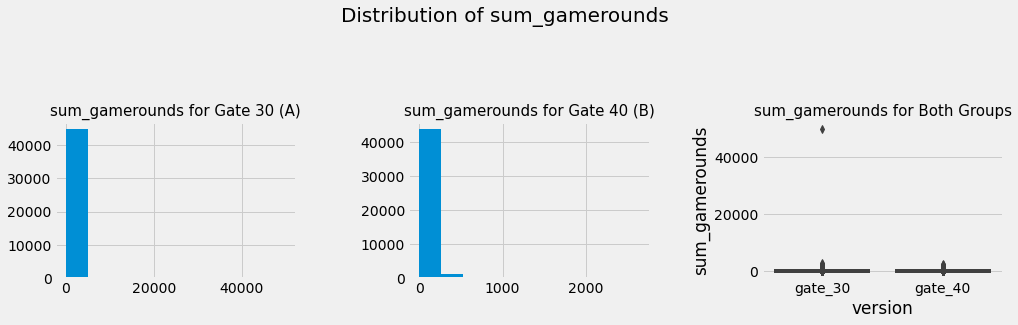

In [28]:
plot_hist(df, "sum_gamerounds", "Distribution of sum_gamerounds")

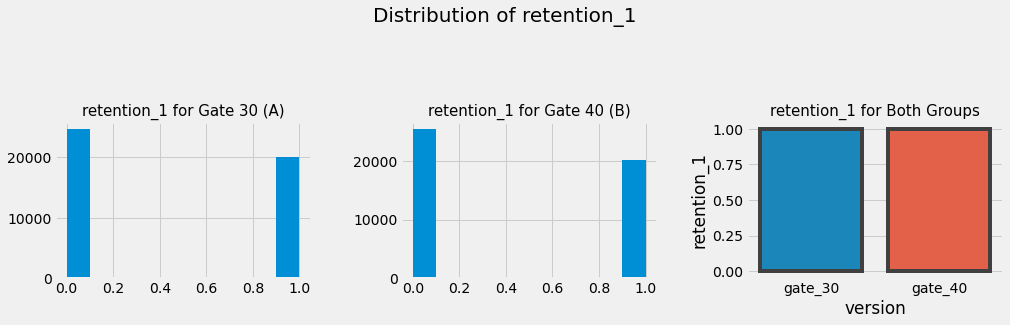

In [33]:
df_ret1 = df
df_ret1['retention_1'] = np.where(df_ret1.retention_1, 1, 0)
plot_hist(df_ret1, "retention_1", "Distribution of retention_1")

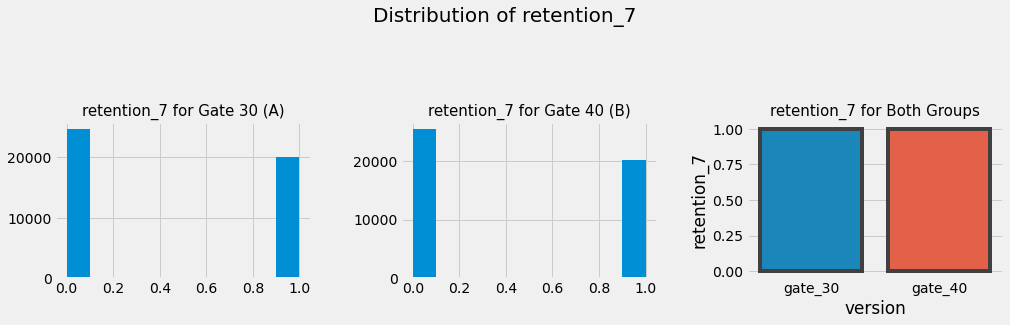

In [37]:
df_ret7 = df
df_ret7['retention_7'] = np.where(df_ret7.retention_7, 1, 0)
plot_hist(df_ret7, "retention_7", "Distribution of retention_7")